In [13]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/Diyorbek-Jabborov/AI_learned_programs/master/Common_Datasets/California_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


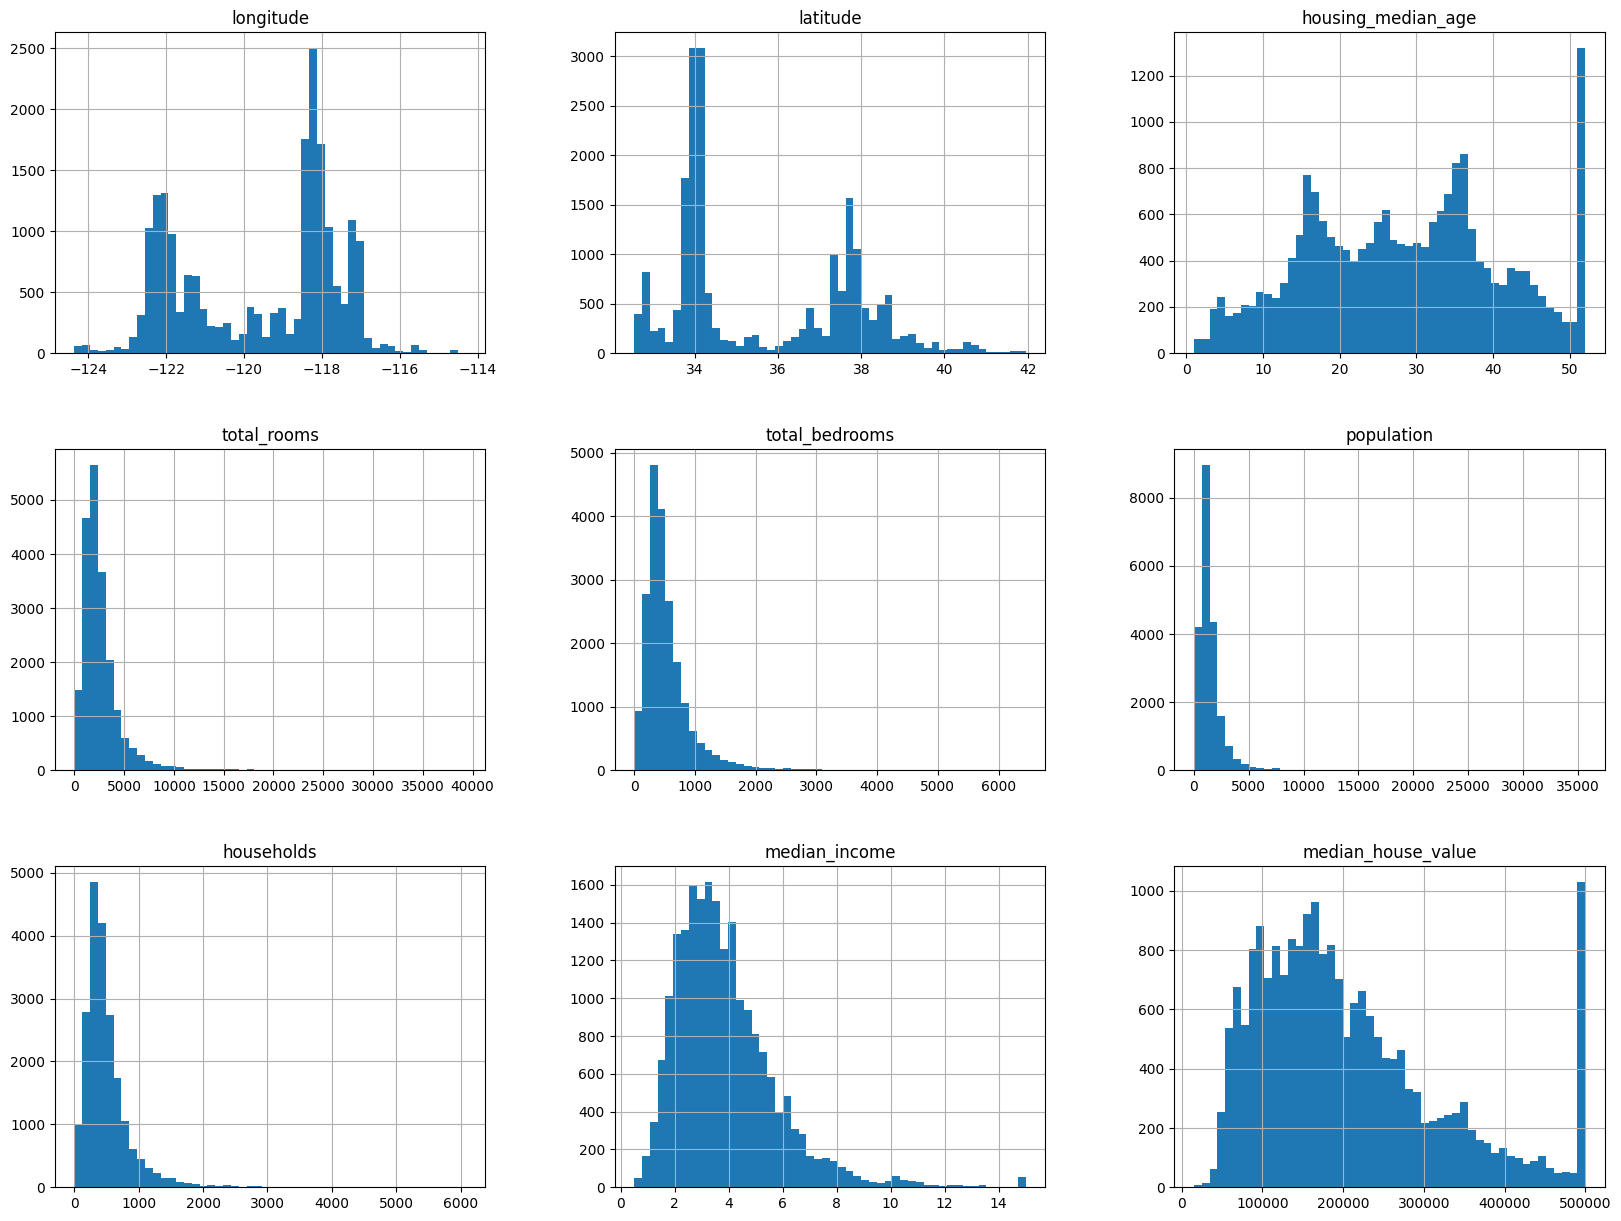

In [16]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=35)

In [18]:
housing = train_set.copy()

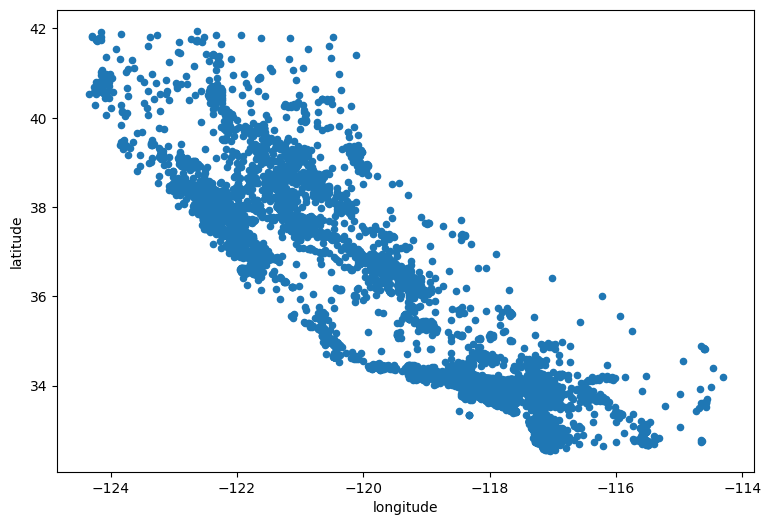

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(9,6))
plt.show()

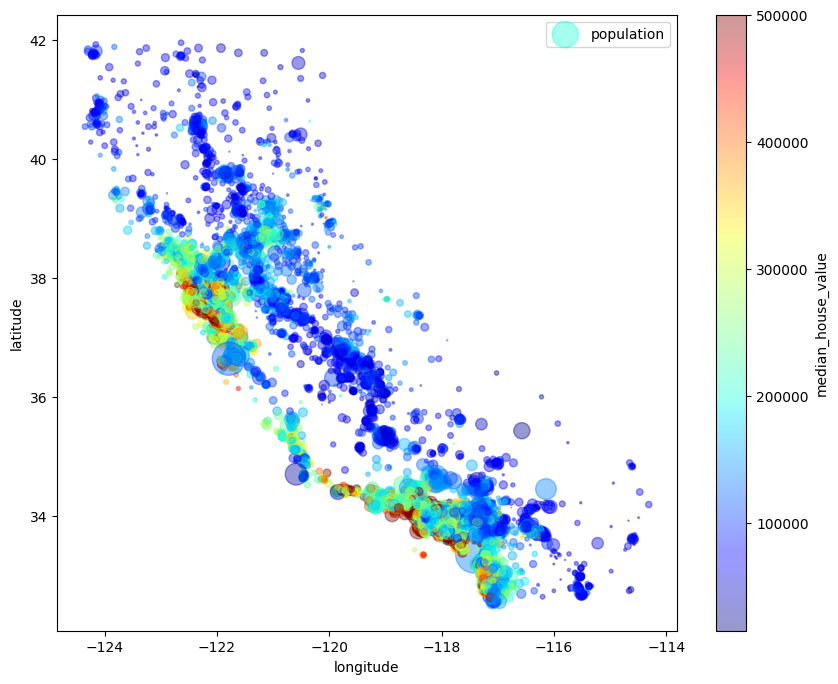

In [29]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"]/50,
    label="population",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    figsize=(10,8)
)
plt.show()

In [30]:
housing.corrwith(housing["median_house_value"]).sort_values(ascending=False)

<ipython-input-30-555a2157f948>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corrwith(housing["median_house_value"]).sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687109
total_rooms           0.132943
housing_median_age    0.106175
households            0.066714
total_bedrooms        0.051019
population           -0.026685
longitude            -0.047650
latitude             -0.142797
dtype: float64

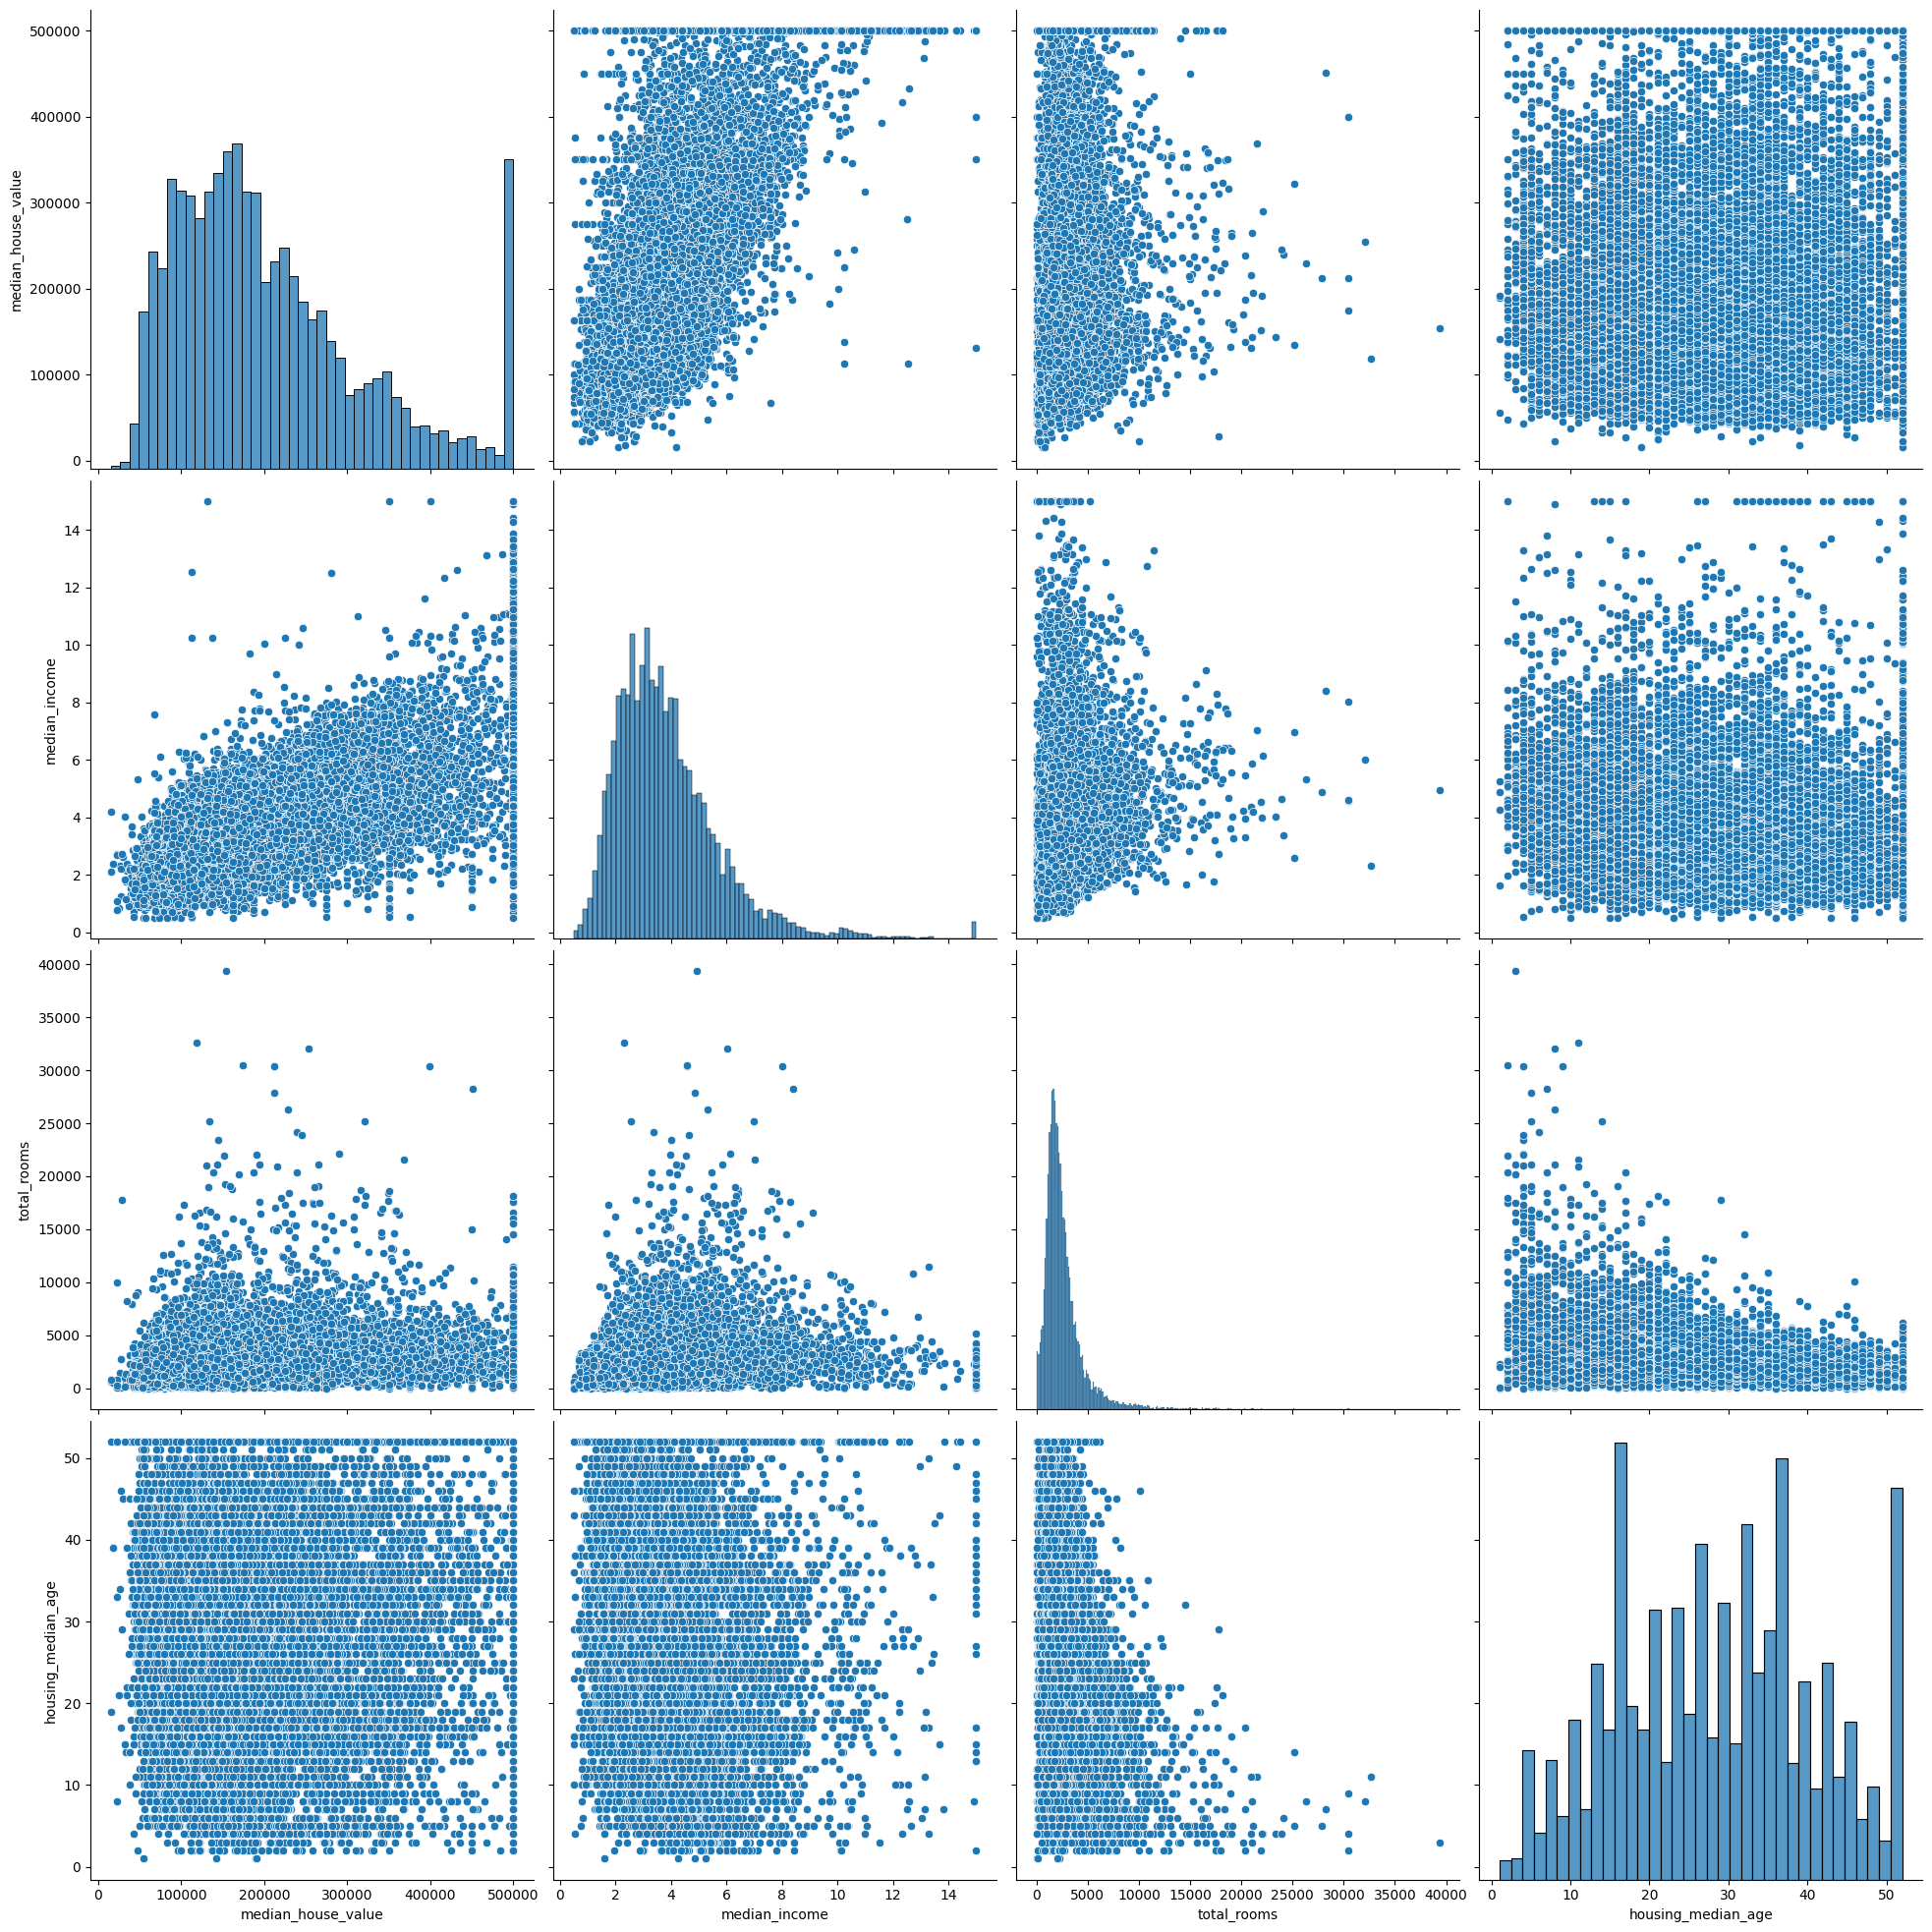

In [31]:
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(housing[cols], height=5)
plt.show()

In [32]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['popilation_per_household'] = housing['population'] / housing['households']

In [33]:
housing.corrwith(housing["median_house_value"]).sort_values(ascending=False)

<ipython-input-33-555a2157f948>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corrwith(housing["median_house_value"]).sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687109
rooms_per_household         0.145460
total_rooms                 0.132943
housing_median_age          0.106175
households                  0.066714
total_bedrooms              0.051019
population                 -0.026685
popilation_per_household   -0.027255
longitude                  -0.047650
latitude                   -0.142797
bedrooms_per_room          -0.249959
dtype: float64